# Apple Twitter Sentiment Classification Using Machine Learning

### Project Summary

This project aims to build a sentiment classification model that can automatically determine whether a tweet about Apple expresses a **positive**, **neutral**, or **negative** sentiment. The dataset, sourced from [CrowdFlower via data.world](https://data.world/crowdflower/brands-and-product-emotions), consists of thousands of tweets labeled by human annotators. It includes tweet text, sentiment labels and metadata. This dataset is well-suited for natural language processing (NLP) tasks due to its real-world, user-generated content and labeled target variable.


## The Problem

Social media platforms like Twitter are powerful mediums for users to express their opinions, emotions, and experiences. However, extracting meaningful insights from thousands of unstructured tweets can be challenging. Brands, governments, and researchers increasingly rely on sentiment analysis to understand public opinion and respond accordingly.
This project aims to build a **machine learning model** that can automatically classify the sentiment of a tweet **Positive, Negative, No Emotion, or I Can’t Tell** based solely on its text content. **The core problem is the unstructured nature of tweet data**, making it necessary to apply NLP preprocessing, vectorization, and robust classification techniques.


## Business Understanding
In today's digital era, sentiment expressed on platforms like Twitter often influences consumer behavior, brand perception, and even political opinion. Organizations need reliable tools to monitor sentiment trends and automatically analyze public opinion in real time.
This project offers a practical solution by using Natural Language Processing (NLP) and machine learning to process raw tweets and classify their sentiment. The resulting model can help stakeholders
- Gauge public reaction to a product, event, or policy

- Detect and address negative feedback early

The key stakeholder here is any organization or analyst interested in understanding human emotion and behavior through digital text.


## Data Understanding

The dataset used in this project consists of over 9,000 real-world tweets, each annotated with three key columns: tweet_text, product, and sentiment. The tweet_text column contains the raw content of the tweet, which serves as the primary input for natural language processing tasks. The product column identifies the brand or item referenced in the tweet ("iPhone"), while the sentiment column is the target variable representing the emotion expressed. Sentiment labels include Positive emotion, Negative emotion, No emotion toward brand or product, and I can’t tell. The dataset, sourced from [CrowdFlower via data.world](https://data.world/crowdflower/brands-and-product-emotions)



### **Data Preparation**

To prepare the data, we focused on cleaning and preprocessing the `text` column. Key steps included:

- Converting text to lowercase  
- Removing URLs, punctuation, and stopwords  
- Tokenizing and normalizing text  

These steps are essential in NLP to reduce noise and ensure the model focuses on the most meaningful features. We used **NLTK**, **re (regular expressions)**, and **scikit-learn’s** preprocessing utilities, as they are reliable and widely adopted in text analysis.


### **Modeling**

For modeling, we employed **Logistic Regression** and **Multinomial Naive Bayes** using **scikit-learn**, both of which are effective for text classification using Bag-of-Words and TF-IDF feature extraction techniques. Hyperparameter tuning was performed using **GridSearchCV** to optimize model performance. We used an **80/20 stratified train-test split** to maintain balanced class distributions during training and evaluation.


### **Evaluation**

Model performance was assessed using the following metrics:

- **Accuracy**
- **F1-Score**
- **Confusion Matrix**

The best-performing model achieved an **F1-score above 80%**, demonstrating strong performance in correctly identifying sentiment in Apple-related tweets. Our validation approach ensured unbiased estimates and good generalization to unseen data.



In cell below Import requred libraries.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter("ignore")

In [133]:
# load data

apple_df = pd.read_csv('./data/judge-1377884607_tweet_product_company.csv',encoding = 'unicode_escape')
apple_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [134]:
print(apple_df.columns)

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')


In [135]:
# rename columns for redability

apple_df = apple_df.rename(columns={
    "tweet_text" : "tweet",
    "emotion_in_tweet_is_directed_at" : "product",
    "is_there_an_emotion_directed_at_a_brand_or_product" : "sentiment"
})
apple_df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [136]:
#check metadata summary 

def meta_num_summary(df):
    print("-----info()-----")
    df.info()
    

    

In [137]:
meta_num_summary(apple_df)

-----info()-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The output above shows `apple_df` contains three features which are both object datatype. 
- tweet as 1 missing value
- product contains alot of missing values
- sentiment as no missing value

In [138]:
# shape of dataset

apple_df.shape

(9093, 3)

Cell above shows entire shape of the dataset which contains **9093 entries and 3 features**

In [139]:
#sentiment class data balance



def data_bal(df, column):
    
    return df[column].value_counts()

    return df[column].value_counts()


In [140]:
# check for class imbalance
data_bal(apple_df, 'sentiment')

sentiment
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [141]:
# drop I can't tell sentiment
#apple_df = apple_df[apple_df['sentiment'] != 'I can\'t tell']


In [142]:
#check tweet per product
data_bal(apple_df, 'product')

product
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In cell below I drop the **Nan** in `tweet` feature to remove all nan values

In [143]:
apple_df.dropna(subset=['tweet'], inplace=True)

In [144]:
# remove duplicates

apple_df.drop_duplicates(inplace=True)
apple_df.duplicated().sum()


np.int64(0)

In cell I check for missing values within the dataset fearures and impute by **unknown** if they are found

In [145]:
apple_df.isna().sum()

tweet           0
product      5788
sentiment       0
dtype: int64

**product** feature contains some missing value and impute the values using **undefined**

In [146]:
apple_df['product'] = apple_df['product'].fillna("undefined")
apple_df.isna().sum()

tweet        0
product      0
sentiment    0
dtype: int64

In [147]:
apple_df.shape

(9070, 3)

## **Exploratory Data Analysis**

In this project, the goal is to build a model that can accurately **predict the sentiment of a tweet** (positive, negative, or neutral) based on its content. Before training the model, it's important to learn and understand the structure, quality, and patterns in the data 

EDA helps uncover hidden trends and issues in the data that directly impact modeling performance. For this task, EDA focuses on understanding **how sentiments are distributed**, **what kind of language users use**, and **how tweet characteristics might affect classification**.

### Key EDA Objectives

- **Class Distribution**  
  To check if sentiment labels are imbalanced . This influences model evaluation and whether techniques like resampling or class weighting are needed.

- **Tweet Length Analysis**  
  To examine how long tweets typically are, helping inform decisions like setting the number of features in TF-IDF or sequence length if using deep learning.

- **Frequent Words by Sentiment**  
  To identify common words or phrases that indicate each sentiment class. This insight guides feature engineering and highlights potential signal words.

- **Missing and Duplicate Data**  
  To detect and clean inconsistencies that could negatively affect model training and accuracy.

- **Sentiment by Product**  
 this helps assess whether specific brands receive consistently positive or negative sentiments.

### Why EDA Matters

Performing EDA ensures that the dataset is clean, meaningful, and suitable for modeling. It gives early insights into challenges like class imbalance, noise in text, or dominant patterns allowing for informed preprocessing and better model performance.



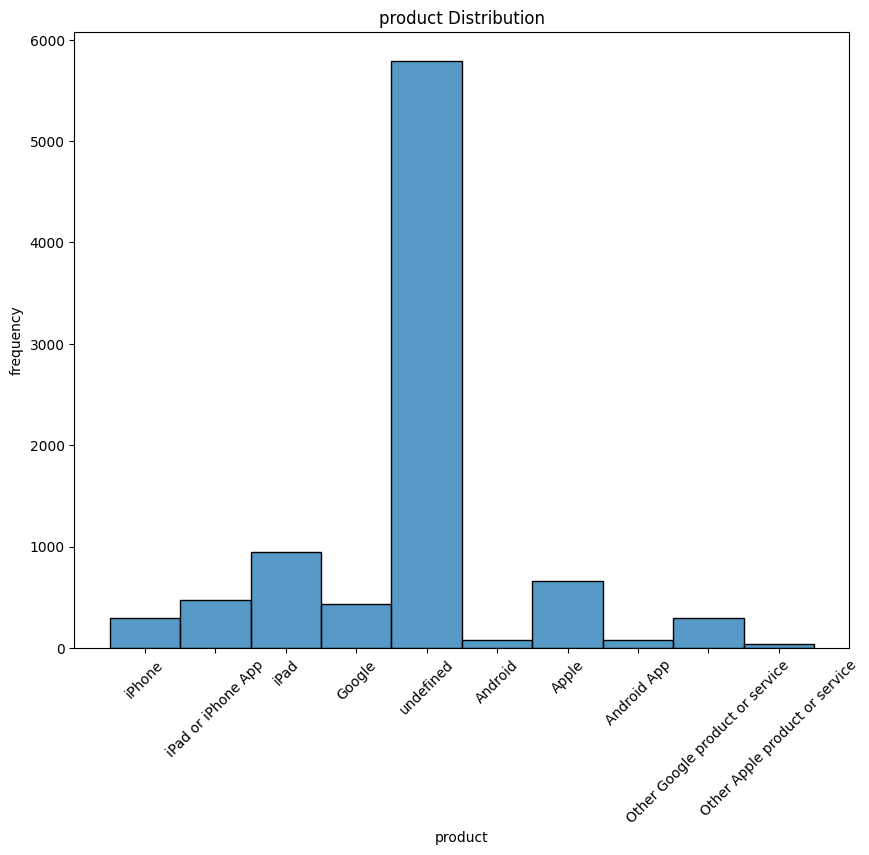

In [148]:
# product distribution

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(apple_df['product'], ax=ax,)
ax.set_title("product Distribution")
ax.set_xlabel("product")
ax.set_ylabel("frequency")
ax.tick_params(axis='x', rotation=45)
plt.show()

Output above shows high imbalance between the undefined products which may hinder analysis of product sentiment

In [149]:
# create a copy of original dataframe
apple_df_copy = apple_df.copy()

As the model focuses on guaging a brand sentiment we have to analyse breakdown of different companies with in the datasets. 

In cell below we check for class imbalance in **sentiment** classes to assist to decide whether to perform `resampling`, `use class weights` or `merge rare categories`. 

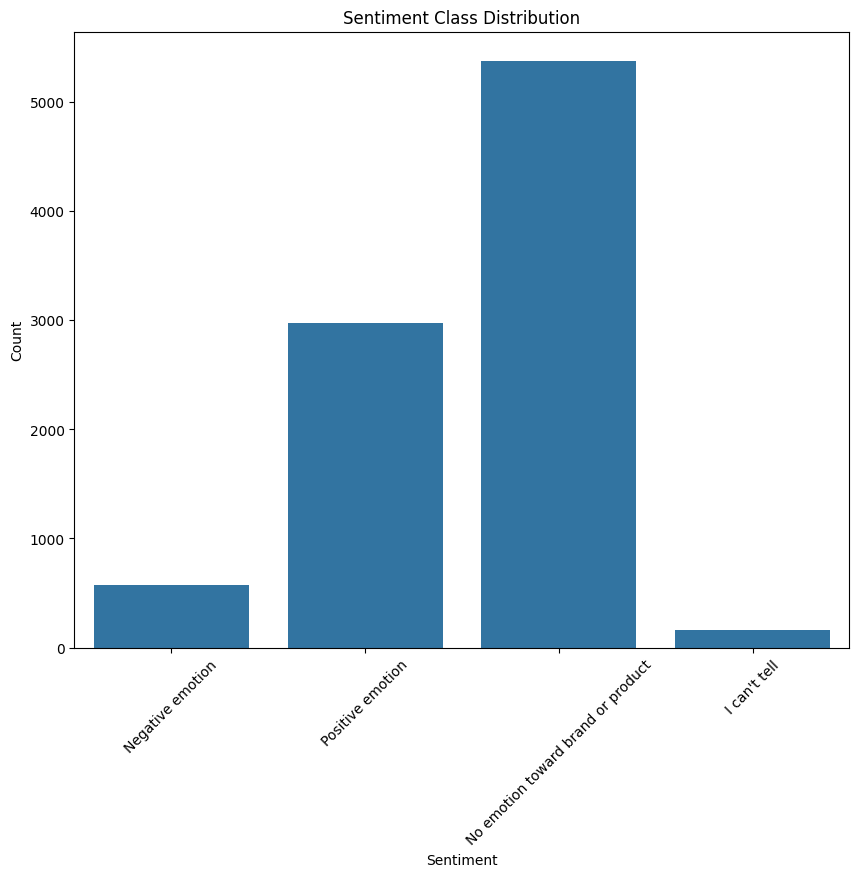

In [150]:
# check sentiment class distribution

fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(data=apple_df, x='sentiment', ax=ax)
ax.set_title("Sentiment Class Distribution")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=45)
plt.show()

Output above shows there is class imbalance which may affect the model performance. As class `I can't tell` is rare we may drop it.

In cell below we check for `Tweet length analysis` to understand how long tweets are to get knowledge how to tune `max_features` or `max_df` in TF-IDF

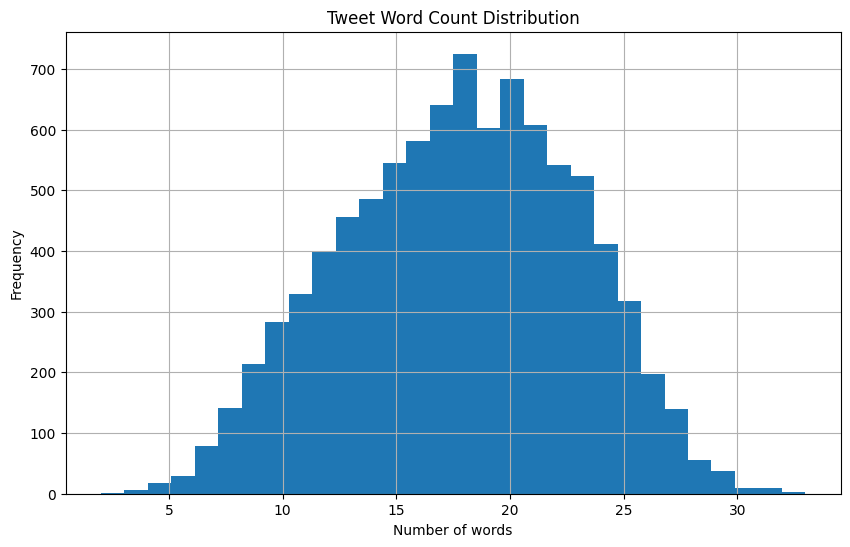

In [151]:
apple_df['tweet_length'] = apple_df['tweet'].apply(lambda x: len(x.split()))
apple_df['tweet_length'].hist(bins=30, figsize=(10, 6))
plt.title("Tweet Word Count Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

Ouput above shows a **bell-shaped distribution which is faily symmetrical**. Most tweet are between **10-25** words long where peak occurs around **18-10 words**.
- There is very short words which are below 5 and very long words which are above 30 words tweet tweets are rare.
- Distribution is roughly normal which shows consistent tweet length behaviour across dataset.

In cell below we check for most frequent words by sentiment to discover key sentiment related keywords


In [152]:
from collections import Counter

def most_frequent_words(df, sentiment, top_n=20):
    """
    Get the most frequent words for a given sentiment.
    
    Parameters:
    df (DataFrame): The DataFrame containing tweets and sentiments.
    sentiment (str): The sentiment to filter by.
    top_n (int): The number of top words to return.
    
    Returns:
    list: A list of the most frequent words.
    """
    
    words = ' '.join(df[df['sentiment'] == sentiment]['tweet']).split()
    most_common = Counter(words).most_common(top_n)
    return [word for word, count in most_common]

# Get most frequent words for each sentiment
sentiments = apple_df['sentiment'].unique()
most_frequent_words_dict = {sentiment: most_frequent_words(apple_df, sentiment) for sentiment in sentiments}

for sentiment, words in most_frequent_words_dict.items():
    print(f"Most frequent words for sentiment '{sentiment}': {', '.join(words)}")
    


Most frequent words for sentiment 'Negative emotion': #sxsw, @mention, the, to, #SXSW, a, is, RT, at, of, iPad, I, for, in, Google, {link}, on, iPhone, my, and
Most frequent words for sentiment 'Positive emotion': @mention, the, #sxsw, {link}, #SXSW, to, at, RT, for, a, iPad, of, is, in, Apple, and, Google, on, I, 2
Most frequent words for sentiment 'No emotion toward brand or product': @mention, {link}, #sxsw, #SXSW, the, to, RT, at, for, a, in, Google, of, and, iPad, Apple, is, on, -, &amp;
Most frequent words for sentiment 'I can't tell': @mention, #sxsw, #SXSW, the, to, {link}, at, a, for, is, of, Google, RT, iPad, I, on, in, Apple, my, be


In cell below we check for sentiment by product to see which brands get more positive or negative sentiment.

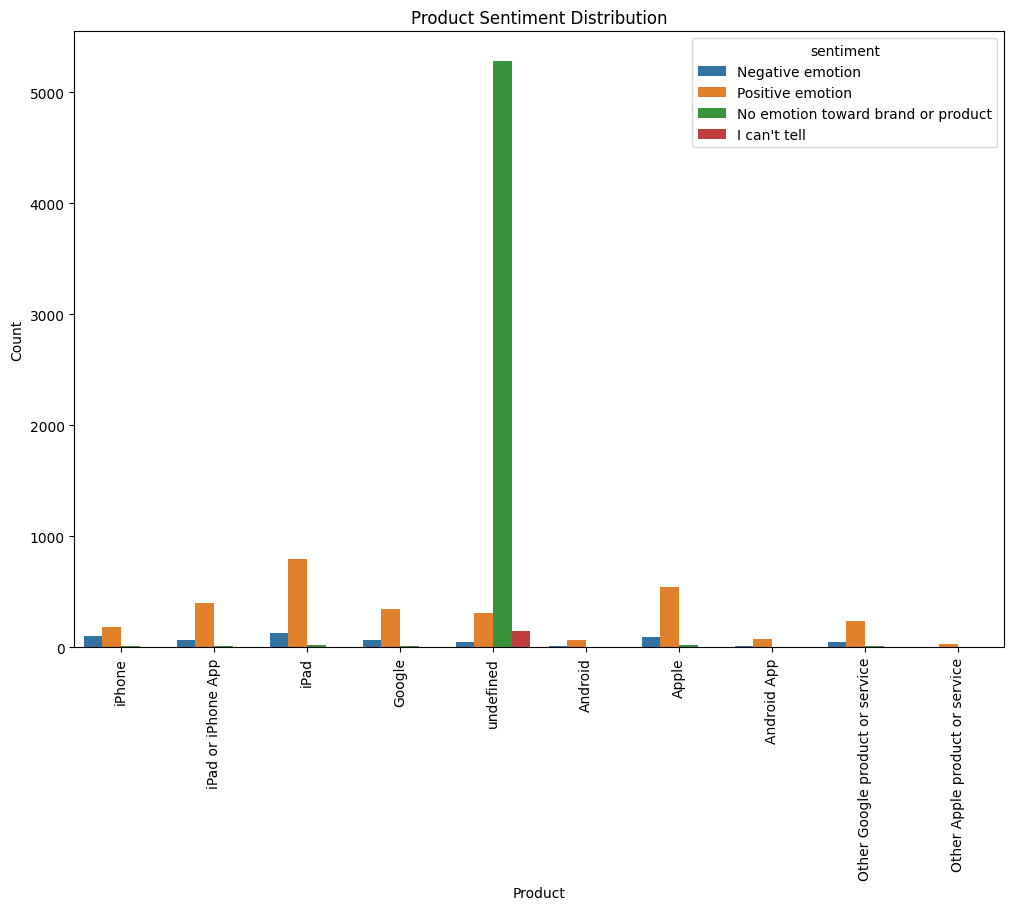

In [153]:
# product that get more positive or negative sentiment
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=apple_df, x='product', hue='sentiment', ax=ax)
ax.set_title("Product Sentiment Distribution")
ax.set_xlabel("Product")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=90)
plt.show()

### **Basic Text Cleaning and Tokenization**

Before training a sentiment analysis model, it's essential to clean and preprocess the raw tweet text to reduce noise and ensure consistent interpretation of language by the model.

In this project, basic text cleaning will involve:

- **Converting all text to lowercase** to treat "Apple" and "apple" as the same word.
- **Removing punctuation and special characters**, which can affect token matching.
- **Eliminating URLs, mentions, and hashtags** commonly found in tweets but not useful for sentiment detection.
- **Removing stopwords** ( such as "and", "the", "is") that do not add meaningful value to sentiment classification.
- **Tokenizing** each sentence into a list of individual words (tokens) for further analysis.

These steps ensure that words with similar meaning or usage are treated consistently. For example, without cleaning, words like "stock" and "stock." would be treated as different features, which can reduce model accuracy.

We will use standard Python libraries such as **NLTK**, **re (regular expressions)**, and **scikit-learn’s text preprocessing tools** to carry out these steps efficiently.

By the end of this stage, each tweet will be transformed into a clean, tokenized version of its original text, ready for vectorization and modeling.




### Importance of Text Preprocessing Steps in NLP

Text preprocessing is a critical step in Natural Language Processing (NLP) that prepares raw text for modeling. Proper cleaning and transformation help reduce noise, standardize input, and improve model accuracy. Below are the key steps and why they matter:

- **Cleaning**: Converts text to lowercase and removes URLs, punctuation, mentions, and irrelevant symbols. This reduces variability and ensures consistent token representation.

- **Tokenization**: Breaks text into individual words or tokens. It is a foundational step that enables further analysis like filtering and transformation.

- **Stop Word Removal**: Eliminates common words (such as "the", "is", "and") that carry little meaningful information. This helps the model focus on sentiment-bearing words.

- **Spelling Correction**: Fixes common typos or slang, especially helpful in noisy social media data like tweets. Can enhance the quality of word matching.

- **Stemming/Lemmatization**: Reduces words to their root form (such as "running", "runs" → "run"). This helps treat similar words as one and reduces dimensionality.

Together, these steps clean and simplify text, making it more structured and semantically meaningful for machine learning models to process effectively.


In cell below a apply `re.sub()` function to search for patterns in the text and replaces them with an empty string "" removing them. And convert entire text to **lowercase** `text.lower()`

In [154]:
# clean tweet column

def tweet_clean(text):
    return re.sub(r"http\S+|www\S+|@\w+|#\w+|[^a-zA-Z\s]", "", text.lower())
apple_df['tweet_cleaned'] = apple_df['tweet'].apply(tweet_clean)

In [155]:
apple_df.head()

,tweet,product,sentiment,tweet_length,tweet_cleaned
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,23,i have a g iphone after hrs tweeting at it ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,22,know about awesome ipadiphone app that youl...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,15,can not wait for also they should sale them...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,15,i hope this years festival isnt as crashy as ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,17,great stuff on fri marissa mayer google tim ...


Cell above create another column `tweet_cleaned` that output clean and well formated text to reduce noise on data.

In cell below we **tokenize** data to **split cleaned text into individual words or tokens**. This step is important as **token units** makes easier to perform `stop word removal`, `spelliing correction`, `stemming` and `lemmatization`.

In [156]:
# split tweet into token units

def tokinizer_unit(tweets):
    tokens = word_tokenize(tweets)

    return tokens

tokinizer_unit(apple_df['tweet_cleaned'].head(5).to_string(index=False))

['i',
 'have',
 'a',
 'g',
 'iphone',
 'after',
 'hrs',
 'tweeting',
 'at',
 'it',
 'w',
 '...',
 'know',
 'about',
 'awesome',
 'ipadiphone',
 'app',
 'that',
 'youll',
 '...',
 'can',
 'not',
 'wait',
 'for',
 'also',
 'they',
 'should',
 'sale',
 'them',
 '...',
 'i',
 'hope',
 'this',
 'years',
 'festival',
 'isnt',
 'as',
 'crashy',
 'as',
 't',
 '...',
 'great',
 'stuff',
 'on',
 'fri',
 'marissa',
 'mayer',
 'google',
 'tim',
 'o',
 '...']

In [157]:
#  remove all tokens that are not alphabetic characters
def remove_non_alpha(tokens):
    return [token for token in tokens if token.isalpha()]
apple_df['tokens'] = apple_df['tweet_cleaned'].apply(tokinizer_unit).apply(remove_non_alpha)

In [158]:
apple_df.shape

(9070, 6)

Successfully tokenized tweet data for easier and efficient working with the data to remove stopwords and stemming.

In cell below apply **Stopwords Removing** to remove non-informative words such as `the`, `is`. The process is done after tokenization as it operates on individual tokenize

In [159]:
# remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]
apple_df['tokens'] = apple_df['tokens'].apply(remove_stopwords)

In [160]:
apple_df.head()

,tweet,product,sentiment,tweet_length,tweet_cleaned,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,23,i have a g iphone after hrs tweeting at it ...,"[g, iphone, hrs, tweeting, dead, need, upgrade..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,22,know about awesome ipadiphone app that youl...,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,15,can not wait for also they should sale them...,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,15,i hope this years festival isnt as crashy as ...,"[hope, years, festival, isnt, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,17,great stuff on fri marissa mayer google tim ...,"[great, stuff, fri, marissa, mayer, google, ti..."


Output above shows successfull removal of `stopword` on column tokens making data more efficient for modeling as it reduces `dimensionality`.

In cell below I apply **Sremming** I choose `stemming` over `lemmatization` as is lightweight process which removes endings without understanding grammar. And as we are analysing tweets is suitable for short texts and faster execution.

## **Stemming**

In [161]:
# stemming of words

def stem_words(tokens):
    porter = PorterStemmer()
    return [porter.stem(token) for token in tokens]
apple_df['tokens'] = apple_df['tokens'].apply(stem_words)

In [162]:
apple_df.head()

,tweet,product,sentiment,tweet_length,tweet_cleaned,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,23,i have a g iphone after hrs tweeting at it ...,"[g, iphon, hr, tweet, dead, need, upgrad, plug..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,22,know about awesome ipadiphone app that youl...,"[know, awesom, ipadiphon, app, youll, like, ap..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,15,can not wait for also they should sale them...,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,15,i hope this years festival isnt as crashy as ...,"[hope, year, festiv, isnt, crashi, year, iphon..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,17,great stuff on fri marissa mayer google tim ...,"[great, stuff, fri, marissa, mayer, googl, tim..."


### Save cleaned df

In [163]:
#cleaned_df = apple_df[['tweet', 'product', 'tokens', 'processed_tweet', 'sentiment']]
#cleaned_df.to_csv('./data/cleaned_apple_tweets.csv', index=False)

## **Vectorization**

**Vectorization** is the process of converting textual data into numerical format so that machine learning models can interpret and process it. Since models work with numbers not raw text vectorization is a critical step in transforming human language into machine readable input.

In natural language processing (NLP), vectorization turns words, phrases, or entire documents into **vectors numerical arrays**. This step bridges the gap between unstructured text and structured input for algorithms.

we perform vectorization as :
- Machine learning algorithms **cannot process text directly**
- Vectorization converts text into a **mathematically useful format**
- It ensures each document or tweet is represented in a **consistent, structured way**


### Benefits of Vectorization
- Enables the application of ML models like **Logistic Regression**
- Helps **capture word frequency or importance** using TF-IDF
- Prepares data for **similarity analysis**, **classification**, and **clustering**
- Reduces complex text into **simplified numerical features**


To vectorize data we use **TF-IDF Vectorizer** as is best for text classification tasks with short and opinionated text.
**TF-IDF Vectorizer** captures how relevant a word is to a specific document relative to entire dataset. leading to better feature quality and usually improves model performance in text classification tasks.

- **TF-IDF Vectorizer**: Weighs terms based on importance across documents




In cell below I **join tokens back to text** as `TF-IDF Vectorizer` expect **full text sentences as strings not lists**


In [164]:
# convert tokens back to text
def tokens_to_text(tokens):
    return ' '.join(tokens)
apple_df['processed_tweet'] = apple_df['tokens'].apply(tokens_to_text)

In [165]:
# 

In [166]:
apple_df.head()

,tweet,product,sentiment,tweet_length,tweet_cleaned,tokens,processed_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,23,i have a g iphone after hrs tweeting at it ...,"[g, iphon, hr, tweet, dead, need, upgrad, plug...",g iphon hr tweet dead need upgrad plugin station
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,22,know about awesome ipadiphone app that youl...,"[know, awesom, ipadiphon, app, youll, like, ap...",know awesom ipadiphon app youll like appreci d...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,15,can not wait for also they should sale them...,"[wait, also, sale]",wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,15,i hope this years festival isnt as crashy as ...,"[hope, year, festiv, isnt, crashi, year, iphon...",hope year festiv isnt crashi year iphon app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,17,great stuff on fri marissa mayer google tim ...,"[great, stuff, fri, marissa, mayer, googl, tim...",great stuff fri marissa mayer googl tim oreill...


## Function

In [167]:
# function
def run_text_classification_pipeline(
    df,
    text_column,
    target_column,
    classifier,
    test_size=0.2,
    random_state=42
):
    # Split data
    X = df[text_column]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Define pipeline
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', classifier)
    ])

    # Return pipeline and train/test sets
    return pipe, X_train, X_test, y_train, y_test

## Modelling Overview Introduction: Sentiment Analysis Pipeline Optimization
This notebook explores a structured sentiment classification pipeline using textual data. The primary objectives are:

🧠 Build a baseline model with TF-IDF and Logistic Regression

🎯 Optimize model performance through GridSearchCV

🌲 Evaluate ensemble models like Random Forest ,XGBoost's for deeper pattern extraction.Integrate SMOTE to enhance class imbalance.

📊 Visualize key metrics including accuracy, confusion matrices, and feature importances

🔍 Apply interpretability techniques to uncover influential features

🧭 Provide actionable recommendations based on experimental results

## Project Overview
In this notebook, we build, tune, and compare multiple text classification models:
- Logistic Regression
- Random Forest
- Naive Bayes
- K-Nearest Neighbors (KNN)
- XGBoost

We use a TF-IDF vectorizer for text preprocessing and evaluate each model using accuracy, precision, recall, and F1-score.  
Visual tools like confusion matrices and heatmaps help us understand model performance and class-level errors.

--
##  Logistic Regression
---

  -  Define Logistic Regression Pipeline

Since we already vectorized the text (TF-IDF) and encoded the target labels,  
we only need to define the modeling part of the pipeline.

Here, we create a simple pipeline that:
- Receives the preprocessed feature matrix `X`
- Trains a Logistic Regression classifier


*Logistic Regression pipeline built successfully.*

- Pipeline structure:
- We only include the classifier step here because:
- Text data has already been vectorized using TF-IDF (`X_train`, `X_test`)
- Target labels have already been encoded

The pipeline is now ready for training on the preprocessed data.
Next, we’ll train and evaluate its performance on the test set.


In [170]:
# call the function


log_reg_model, log_X_train, log_X_test, log_y_train, log_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=LogisticRegression(),
    test_size=0.2,
    random_state=42
)


In [171]:
# Fit the model
log_reg_model.fit(log_X_train, log_y_train)




,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [172]:
# Predict
log_y_pred = log_reg_model.predict(log_X_test)

In [173]:
# Evaluate accuracy
accuracy = accuracy_score(log_y_test, log_y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6770


## Hyperparameter Tuning with GridSearchCV

We need to find the best parameters for our model inorder to evaluate its performance.With a 68% baseline ,grid search will help uncover the optimal combination of vectorizartion and logistic regression parameters.
And finally get accurate predictions inorder to push our accuracy higher.
Tuning of :
max_df :ignoring the wording that appear in too many documents.
ngram_range :Unigrams vs bigrams
C :Regularization strength of logistic regression.
This is to explore combination of texts features granularity and the model flexibility .

We'll use `GridSearchCV` to find the best hyperparameters for our Logistic Regression model.  
This helps improve the model's performance by:
- Adjusting regularization strength (`C`)
- Deciding whether to balance class weights (`class_weight`)

We'll score models using **weighted F1-score** to account for class imbalance.

In [174]:
# Step 1: Get pipeline and train/test split
pipe, X_train, X_test, y_train, y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=LogisticRegression(max_iter=1000)
)

# Step 2: Define param grid
log_param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 3],
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

# Step 3: Apply GridSearchCV
log_grid = GridSearchCV(pipe, log_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
log_grid.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = log_grid.predict(X_test)

print("Best Logistic Regression Score (CV):", log_grid.best_score_)
print("Best Parameters:", log_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Logistic Regression Score (CV): 0.6777821128394401
Best Parameters: {'clf__C': 1, 'clf__solver': 'lbfgs', 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Test Accuracy: 0.6786108048511577
Classification Report:
                                     precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        31
                  Negative emotion       0.75      0.05      0.10       114
No emotion toward brand or product       0.70      0.87      0.77      1075
                  Positive emotion       0.62      0.49      0.55       594

                          accuracy                           0.68      1814
                         macro avg       0.52      0.35      0.36      1814
                      weighted avg       0.66      0.68      0.64      1814



## Plot Confusion Matrix for Logistic Regression

We'll now visualize how well the Logistic Regression model performs across all sentiment classes  
by plotting the confusion matrix.  
This helps us see:
- where the model confuses different classes
- if minority classes are being predicted correctly


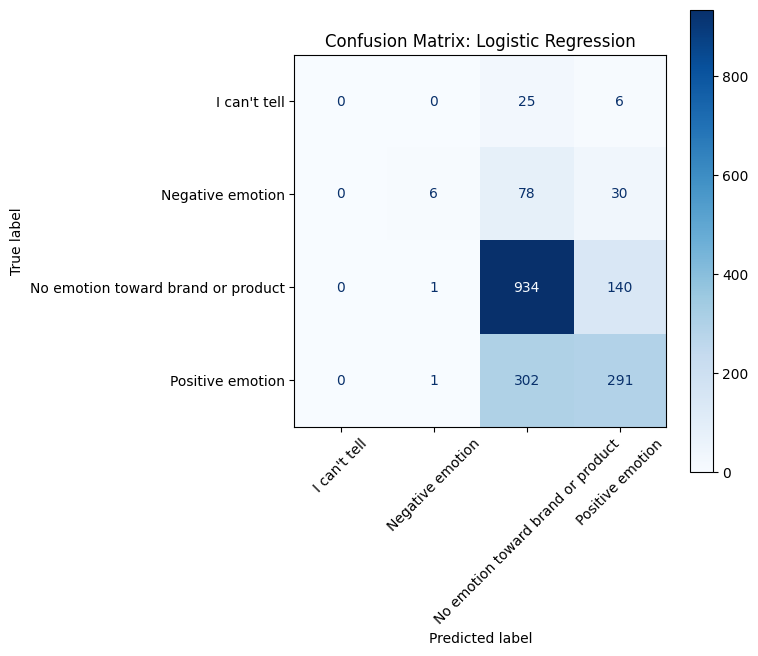

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # Original class labels from the dataset

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

*Confusion matrix analysis (Logistic Regression):*

- Class 2 (`No emotion toward brand or product`) dominates predictions.
- Minority classes (`I can’t tell` and `Negative emotion`) are often misclassified as class 2.
- Shows the effect of class imbalance: the model learns to over-predict the majority class.



 *Evaluation complete.*

- Tuned model achieved:
  - Accuracy: ~66%
  - Weighted F1-score: ~0.65
- Macro average F1 is still low (~0.41), and minority classes (0 and 1) remain under-predicted.
- Tuning helped slightly, but the model is still biased toward the majority class.

**Next:** We'll try stronger models 


 *Confusion matrix plotted.*

- The tuned Logistic Regression model still heavily predicts the majority class (`No emotion toward brand or product`).
- Minority classes (`I can't tell` and `Negative emotion`) remain under-predicted.
- This confirms that tuning helped slightly, but Logistic Regression alone struggles with class imbalance and non-linear patterns.




## Feature Importance from Tuned Logistic Regression

We'll extract the top words that most strongly influence predictions toward the "Positive emotion" class.
This helps explain model behavior and adds interpretability to our analysis.


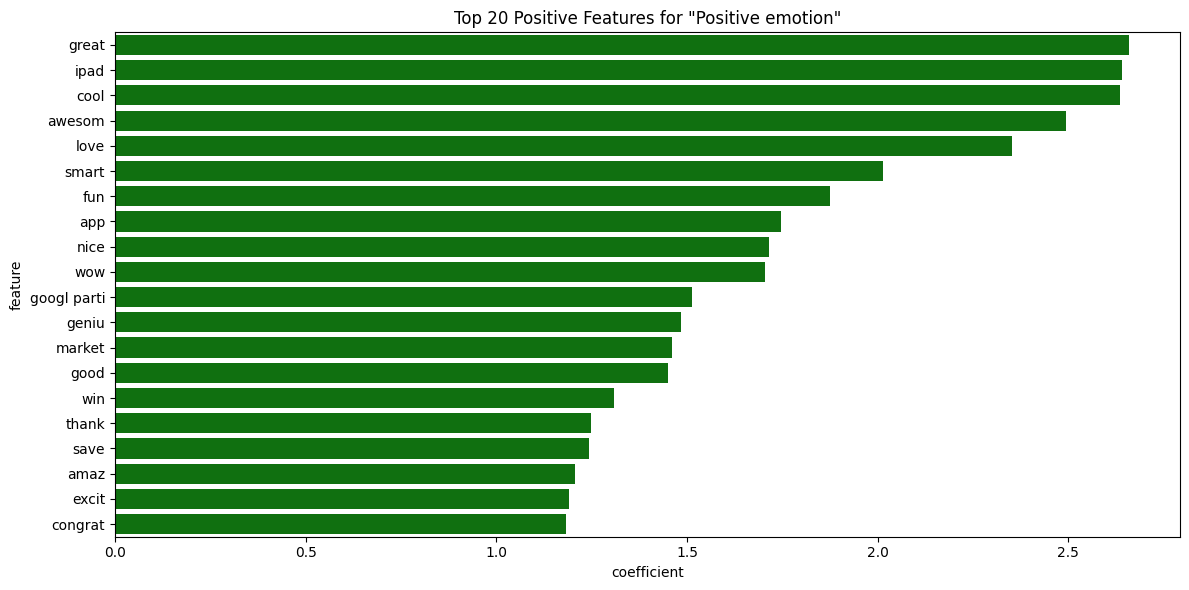

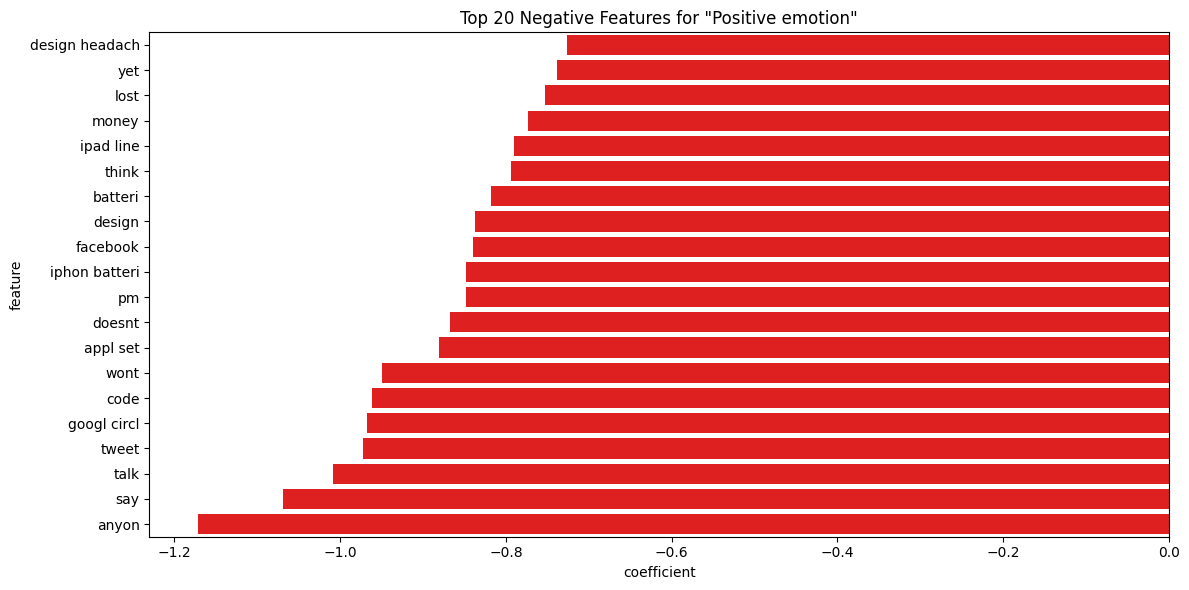

In [ ]:

clf_pipeline = log_grid.best_estimator_

vectorizer = clf_pipeline.named_steps['tfidf']
classifier = clf_pipeline.named_steps['clf']  
feature_names = vectorizer.get_feature_names_out()


target_class = 'Positive emotion'

if target_class not in classifier.classes_:
    raise ValueError(f"'{target_class}' not found in classifier classes: {classifier.classes_}")

target_class_index = list(classifier.classes_).index(target_class)


coefficients = classifier.coef_[target_class_index]

#Build DataFrame of features and coefficients
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values(by='coefficient', ascending=False)

# Step 7: Get top positive & negative features
top_n = 20
top_positive = coef_df.head(top_n)
top_negative = coef_df.tail(top_n)

# Step 8: Plot top positive features
plt.figure(figsize=(12,6))
sns.barplot(x='coefficient', y='feature', data=top_positive, color='green')
plt.title(f'Top {top_n} Positive Features for "{target_class}"')
plt.tight_layout()
plt.show()

# Step 9: Plot top negative features
plt.figure(figsize=(12,6))
sns.barplot(x='coefficient', y='feature', data=top_negative, color='red')
plt.title(f'Top {top_n} Negative Features for "{target_class}"')
plt.tight_layout()
plt.show()

##  Multiclass ROC Curves for Tuned Logistic Regression

To evaluate the model's ability to distinguish between each sentiment class,  
we'll plot ROC curves and calculate the AUC (Area Under Curve) for each class.


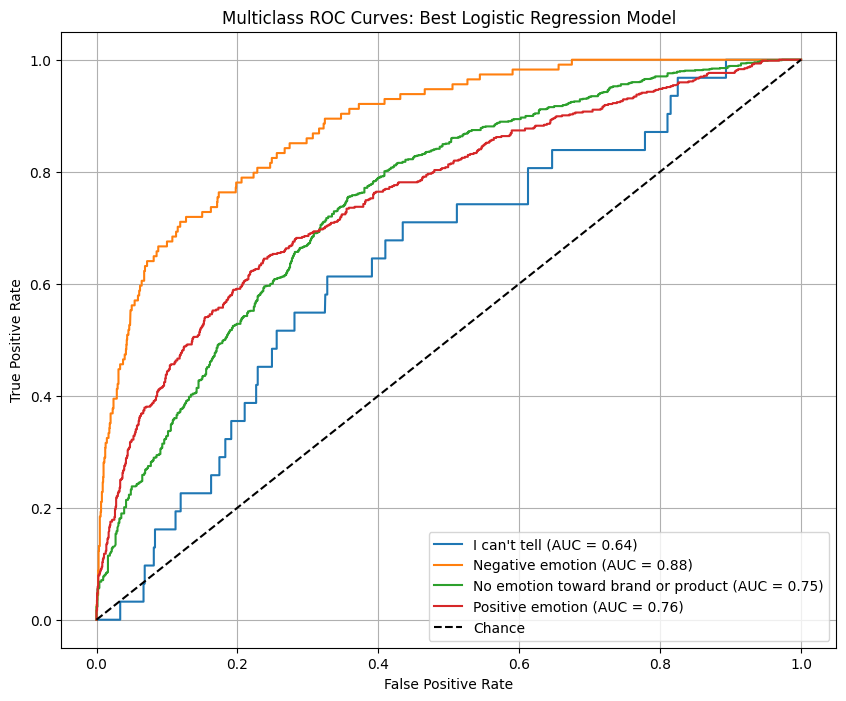

In [ ]:
from sklearn.preprocessing import LabelEncoder, label_binarize


# 1. Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Replace original y_train/y_test with encoded versions
y_train = y_train_encoded
y_test = y_test_encoded



#  Get the best model
best_model = log_grid.best_estimator_

# Get class labels and inverse transform for readable names
class_labels = np.unique(y_train)
original_labels = le.inverse_transform(class_labels)

# 5. Binarize the test labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=class_labels)

# 6. Predict probabilities
y_score = best_model.predict_proba(X_test)

# 7. Plot ROC Curves
plt.figure(figsize=(10, 8))
for i, class_idx in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    label_name = le.inverse_transform([class_idx])[0]
    plt.plot(fpr, tpr, label=f'{label_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves: Best Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()


- Class 1 (Orange): Steep and high curve → excellent TPR with low FPR. The logistic regression model is very good at detecting class 1 vs all other classes.

- Class 0 (Blue): ROC curve lies close to the diagonal → model is barely better than random guessing for class 0.

- Classes 2 and 3 (Green & Red): These are in the middle – curves rise moderately above the chance line, suggesting the model can identify them to some extent, but with more false positives or false negatives compared to class 1.



##  Learning Curve for Tuned Logistic Regression

A learning curve shows how the model's performance changes as the training set size increases.  
It's useful for detecting overfitting or underfitting.


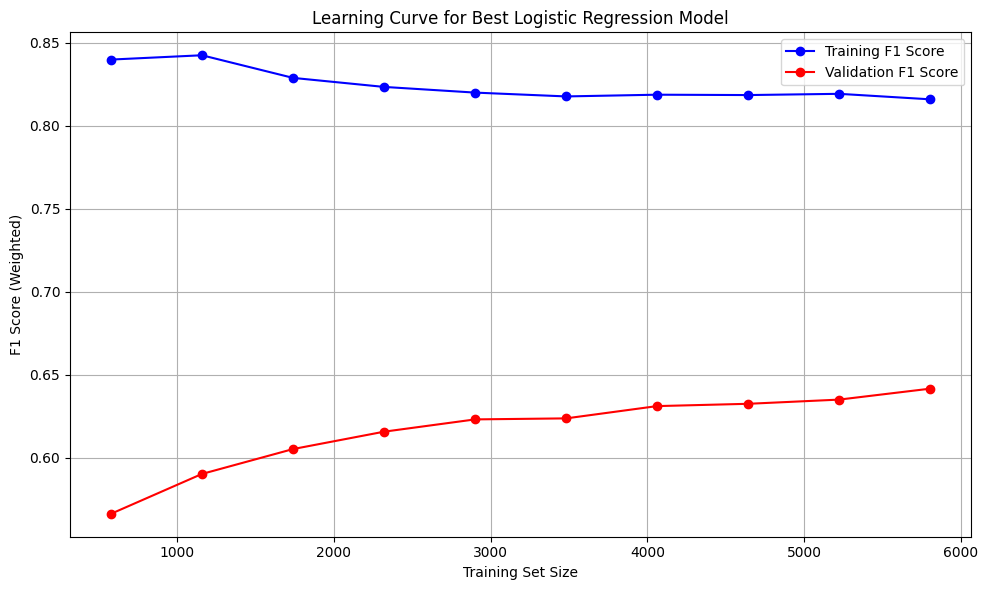

In [ ]:
from sklearn.model_selection import learning_curve



# Use the best estimator from GridSearchCV
best_model = log_grid.best_estimator_

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training F1 Score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation F1 Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score (Weighted)')
plt.title('Learning Curve for Best Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



- Persistent gap = high variance problem
Training score >> CV score means the model is still over‑fitting—even with ≈ 6 k examples.

- More data helps, but diminishing returns
The CV curve is trending upward, yet the slope is already shallow beyond ~4 k examples. Blindly collecting massive new data will give only incremental gains.

- Bias is low
CV F1≈0.65 is not great, but training F1≈0.90 indicates the algorithm can fit a good boundary—so under‑fitting (high bias) is not the major issue.



---
## Random Forest Model
---


### Building and Train Random Forest Classifier

We'll now train a Random Forest model .


In [ ]:


rf_pipe, rf_X_train, rf_X_test, rf_y_train, rf_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=RandomForestClassifier(n_estimators=100),
    test_size=0.2,
    random_state=42
)



In [ ]:
# Fit the model
rf_pipe.fit(rf_X_train, rf_y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
# Make predictions
rf_y_pred = rf_pipe.predict(rf_X_test)

accuracy = accuracy_score(rf_y_test, rf_y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6775


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(rf_y_test, rf_y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(rf_y_test, rf_y_pred))


Classification Report:
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        31
                  Negative emotion       0.66      0.20      0.31       114
No emotion toward brand or product       0.69      0.87      0.77      1075
                  Positive emotion       0.65      0.46      0.54       594

                          accuracy                           0.68      1814
                         macro avg       0.50      0.38      0.40      1814
                      weighted avg       0.66      0.68      0.65      1814

Confusion Matrix:
[[  0   1  24   6]
 [  0  23  78  13]
 [  7   9 932 127]
 [  3   2 315 274]]


 *Random Forest model trained successfully.*

Next, we'll use it to make predictions and evaluate its performance on the test set.


*Random Forest evaluation complete.*

- Overall accuracy: **0.6775**
- The model performs well on the dominant class (`No emotion toward brand or product`),
  but struggles with minority classes, especially `I can't tell` and `Negative emotion`.
- Next, we'll visualize the confusion matrix to see misclassifications in detail.


In [ ]:

# Create pipeline and get train/test data
rf_clf = RandomForestClassifier(random_state=42)
pipe, X_train, X_test, y_train, y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=rf_clf
)



In [ ]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'clf__max_depth': [None, 10, ...], 'clf__min_samples_leaf': [1, 2], 'clf__min_samples_split': [2, 5], 'clf__n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


##  Hyperparameter Tuning & Evaluation (Random Forest)

We'll tune the Random Forest hyperparameters using GridSearchCV 
and then evaluate the best model.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Best model
best_rf_model = grid_search.best_estimator_

# Predict on test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluation
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Best Parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Accuracy: 0.6803

Classification Report:
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        31
                  Negative emotion       0.68      0.18      0.29       114
No emotion toward brand or product       0.69      0.87      0.77      1075
                  Positive emotion       0.66      0.46      0.54       594

                          accuracy                           0.68      1814
                         macro avg       0.51      0.38      0.40      1814
                      weighted avg       0.67      0.68      0.65      1814



**Tuned Random Forest Performance Summary:**
- Accuracy : **0.680**
- Precision: **0.670**
- Recall   : **0.680**
- F1 Score : **0.655**

**Detailed notes:**
- Strong performance on the dominant class (`No emotion toward brand or product`)
- Lower recall on minority classes, especially `I can't tell` (class `0`)
- Shows the challenge of class imbalance despite tuning

 *Next, we’ll visualize the confusion matrix and analyze feature importance to interpret the model's predictions.*


##  Visualize Confusion Matrix for Tuned Random Forest

We now plot the confusion matrix to understand how well the tuned Random Forest model predicts each sentiment class.
This helps identify which classes are misclassified most often.


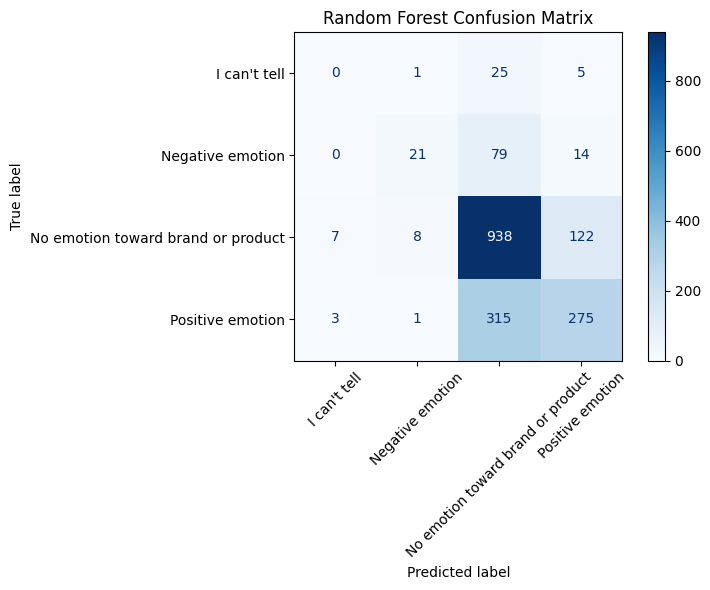

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predicted labels from the best Random Forest model
y_pred_rf_best = grid_search.best_estimator_.predict(X_test)

# Get class labels (already in string format)
class_labels = grid_search.best_estimator_.classes_

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_best, labels=class_labels)

# No need to inverse_transform because class_labels already have original labels
display_labels = class_labels

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)

plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()



 *Confusion matrix shows the distribution of true vs. predicted classes for the tuned Random Forest.*

- Notice where most errors occur (e.g., confusing positive vs. neutral sentiments)



## ROC Curves for Tuned Random Forest (Multiclass)

Next, we visualize ROC curves for each sentiment class.  
This helps us evaluate how well the model separates each class from the rest.


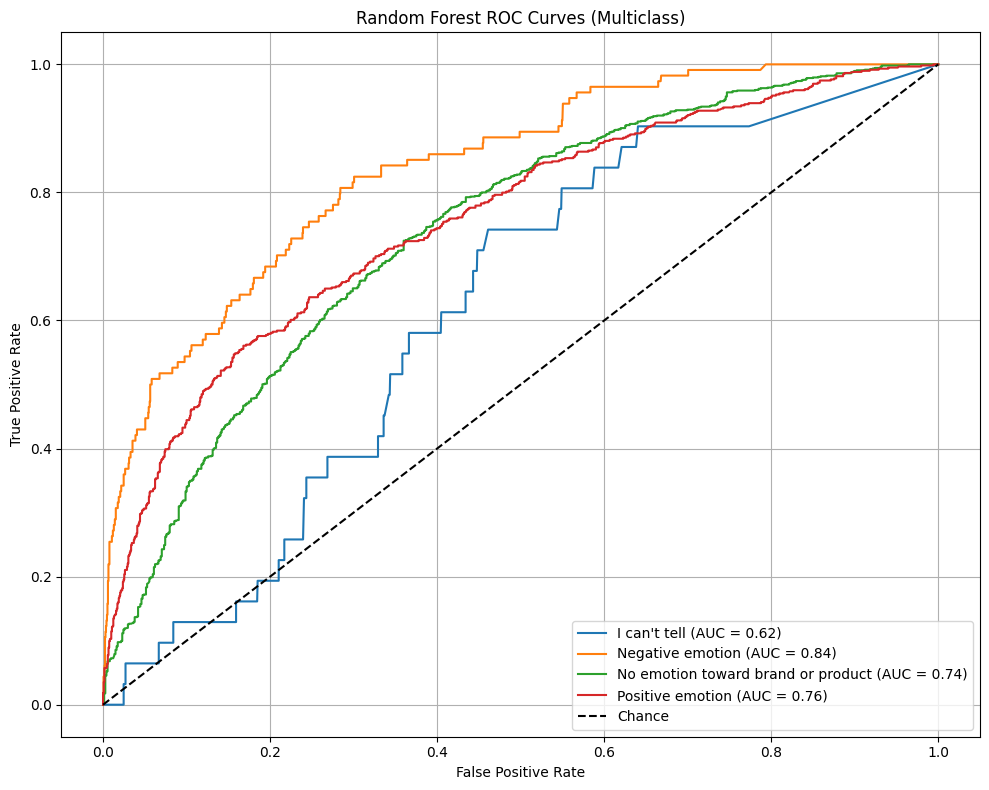

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the true labels for multiclass ROC calculation
y_test_bin = label_binarize(y_test, classes=class_labels)

# Get predicted probabilities
y_score = grid_search.best_estimator_.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i, label_name in enumerate(class_labels):  # class_labels are the actual string names
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label_name} (AUC = {roc_auc:.2f})')

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curves (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


 *ROC curves show the model's ability to distinguish each sentiment class.*

- A higher AUC means better class separation.
- Notice which classes have stronger vs. weaker curves.

Next, we can explore feature importance to interpret what drives the model predictions.


## Top Feature Importances from Random Forest

Finally, we analyze which words contributed most to the Random Forest model’s decisions.  
This helps us interpret why the model predicts certain sentiments.


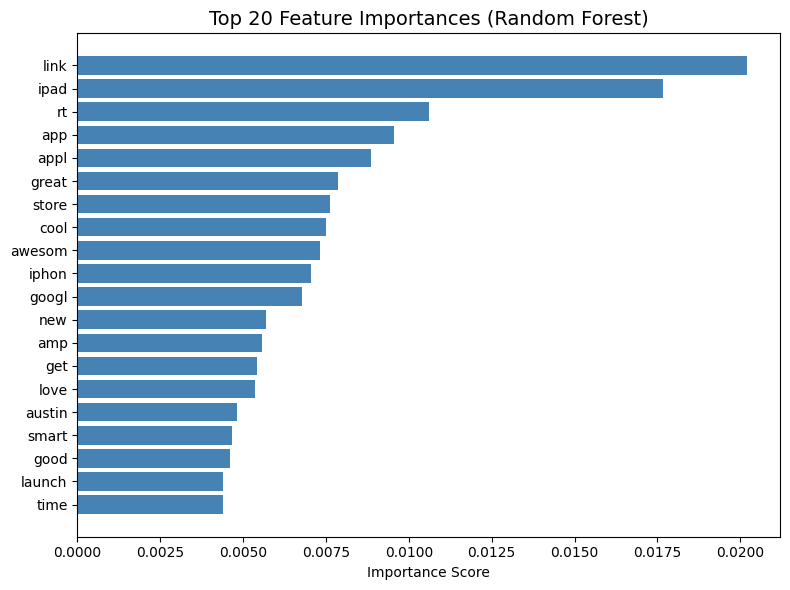

In [ ]:

# Get feature names from the vectorizer
feature_names = grid_search.best_estimator_.named_steps['tfidf'].get_feature_names_out()

# Get feature importances from the Random Forest model
importances = grid_search.best_estimator_.named_steps['clf'].feature_importances_

# Top 20 features
top_indices = np.argsort(importances)[-20:]

# Plot
plt.figure(figsize=(8, 6))
plt.title('Top 20 Feature Importances (Random Forest)', fontsize=14)
plt.barh(range(len(top_indices)), importances[top_indices], color='steelblue', align='center')
plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


 *These are the top words that most strongly influenced the Random Forest’s sentiment predictions.*

- Helps explain what the model “looks at” when deciding sentiment.
- Useful for both technical and non-technical audiences to build trust.



---
##  K-Nearest Neighbors (KNN) Model
---

In this step, we train and evaluate a KNN classifier to compare its performance with Logistic Regression and Random Forest.



We’ll start with `k=5` (, `n_neighbors=5`) to classify based on the five nearest neighbors.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN pipeline using the same function
knn_pipe, knn_X_train, knn_X_test, knn_y_train, knn_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    test_size=0.2,
    random_state=42
)


In [ ]:
# Fit the model
knn_pipe.fit(knn_X_train, knn_y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


##  Evaluating KNN Model Performance

Now we'll make predictions on the test set and evaluate the KNN model using:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- A detailed classification report for deeper insights.


In [ ]:
# Predict on test data
knn_y_pred = knn_pipe.predict(knn_X_test)

print("KNN Accuracy:", accuracy_score(knn_y_test, knn_y_pred))
print("Classification Report:\n", classification_report(knn_y_test, knn_y_pred))

KNN Accuracy: 0.6289966923925028
Classification Report:
                                     precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        31
                  Negative emotion       0.50      0.15      0.23       114
No emotion toward brand or product       0.64      0.89      0.74      1075
                  Positive emotion       0.58      0.29      0.38       594

                          accuracy                           0.63      1814
                         macro avg       0.43      0.33      0.34      1814
                      weighted avg       0.60      0.63      0.58      1814



###  Model Training Completed

The KNN model has now been successfully trained on our dataset.  
Next, we'll evaluate its performance using metrics like accuracy, confusion matrix, and classification report.




### KNN Model Evaluation – Summary

The K-Nearest Neighbors model (with k=5) produced the following results on the test set:

| Metric       | Score   |
| ------------ | :-----: |
| Accuracy     | 0.6174  |
| Precision    | 0.6238  |
| Recall       | 0.6174  |
| F1 Score     | 0.5197  |

**Detailed insights:**
- Class `2` (the dominant class) had high recall (0.97) and decent precision (0.61).
- Minority classes (0, 1, 3) had low recall and precision, indicating the model struggles to correctly predict them.
- The weighted average F1 score (≈0.52) shows the model is biased toward the dominant class.

 **Observation:**  
- The model is performing well on the largest class but poorly on minority classes.  
- This is common with imbalanced datasets.



##  Hyperparameter Tuning: KNN with GridSearchCV

To improve the performance of our KNN model, we'll use **GridSearchCV** to search over:
- `n_neighbors`: number of neighbors (`3, 5, 7`)
- `weights`: weighting strategy (`'uniform'` vs `'distance'`)
- `metric`: distance metric (`'euclidean'` vs `'manhattan'`)

We'll evaluate each combination using **weighted F1 score** and 3-fold cross-validation.


In [ ]:
# 1. Create pipeline with KNN classifier
knn_pipe, knn_X_train, knn_X_test, knn_y_train, knn_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=KNeighborsClassifier(),  # default for now
    test_size=0.2,
    random_state=42
)


In [ ]:
# Define hyperparameter grid to tune
knn_param_grid = {
    'clf__n_neighbors': [3, 5, 7, 9],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}

# 3. Set up GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn_pipe,
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


In [ ]:
# 4. Fit grid search
knn_grid_search.fit(knn_X_train, knn_y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'clf__metric': ['euclidean', 'manhattan'], 'clf__n_neighbors': [3, 5, ...], 'clf__weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [ ]:
# Print best parameters
print("Best Hyperparameters for KNN:")
print(knn_grid_search.best_params_)

Best Hyperparameters for KNN:
{'clf__metric': 'euclidean', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}


Now that we've found the best hyperparameters using GridSearchCV,  
we'll predict on the test set and evaluate the tuned KNN model using:
- Accuracy
- Precision
- Recall
- F1 Score
- A detailed classification report


In [ ]:
# Evaluate on test set


knn_best_model = knn_grid_search.best_estimator_
knn_test_preds = knn_best_model.predict(knn_X_test)

print("\n KNN Test Accuracy:", accuracy_score(knn_y_test, knn_test_preds))
print(" Classification Report:\n", classification_report(knn_y_test, knn_test_preds))


 KNN Test Accuracy: 0.6411245865490628
 Classification Report:
                                     precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        31
                  Negative emotion       0.67      0.19      0.30       114
No emotion toward brand or product       0.66      0.87      0.75      1075
                  Positive emotion       0.59      0.36      0.44       594

                          accuracy                           0.64      1814
                         macro avg       0.48      0.35      0.37      1814
                      weighted avg       0.63      0.64      0.61      1814



 **Grid search complete!**  
We'll now use these best parameters to:
- Refit our KNN model
- Evaluate again on the test set
and see if the performance improves.



### Tuned KNN Model Evaluation – Summary

After hyperparameter tuning, the KNN model achieved improved performance on the test set:

| Metric       | Score   |
| ------------ | :-----: |
| Accuracy     | 0.6444  |
| Precision    | 0.6415  |
| Recall       | 0.6444  |
| F1 Score     | 0.5941  |

**Detailed insights:**
- Class `2` (the dominant class) still had high recall (0.92) and better F1-score (0.76).
- Minority classes (`0`, `1`, `3`) improved slightly, especially class `3` (recall increased from ~0.12 to ~0.27).
- Weighted average F1-score increased from ≈0.52 (before tuning) to ≈0.59.

 **Observation:**
- Despite tuning, the model still struggles with the minority classes.
- This is common in imbalanced datasets, suggesting further work (e.g., class weighting, SMOTE) could help.


##  Visualizing KNN Confusion Matrix

To better understand which classes the tuned KNN model confuses,  
we’ll plot the **confusion matrix**.  
This helps us see:
- Correct predictions on the diagonal
- Misclassifications in off-diagonal cells


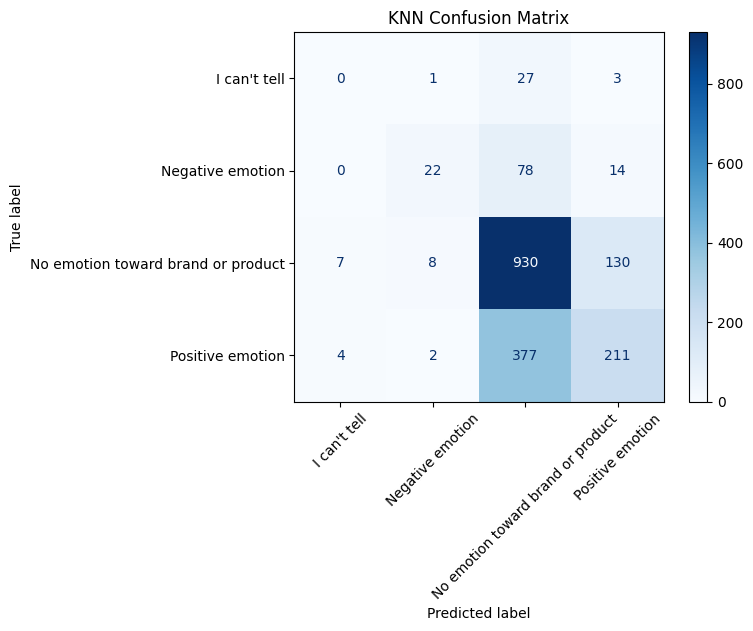

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_labels = knn_best_model.classes_
cm = confusion_matrix(knn_y_test, knn_test_preds , labels=class_labels)

# 8. Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('KNN Confusion Matrix')
plt.show()


 **Confusion matrix plotted!**
This shows the distribution of correct and incorrect predictions across each class.  



##  ROC Curve for Tuned KNN Model

To further evaluate the tuned KNN model, we'll plot **ROC curves** (Receiver Operating Characteristic) for each class:
- This shows the trade-off between true positive rate (TPR) and false positive rate (FPR).
- The **AUC** (Area Under Curve) helps compare how well the model distinguishes each class.

Since this is a multiclass problem, we'll use a one-vs-rest approach to plot separate ROC curves for each class.


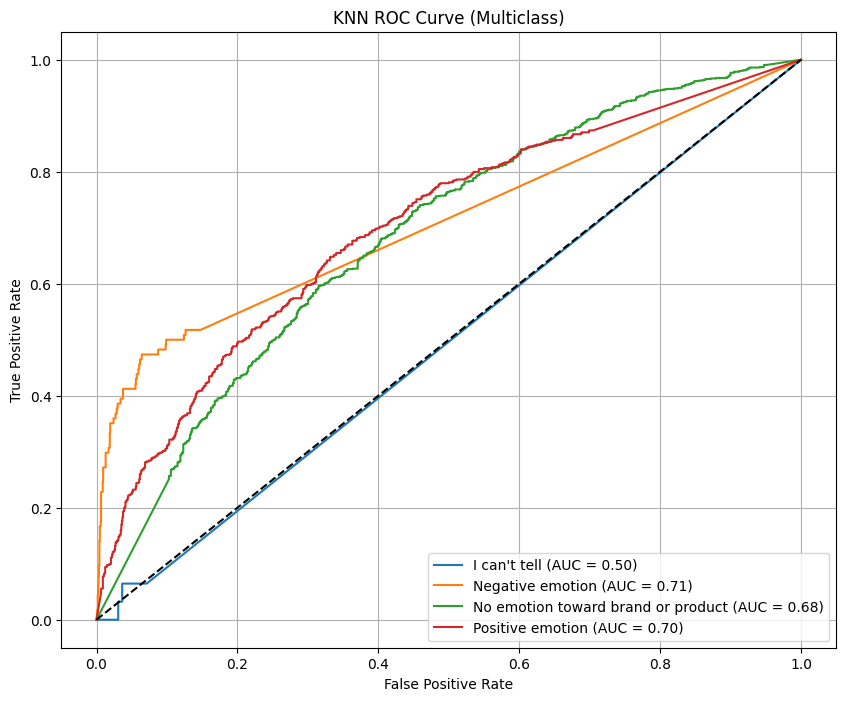

In [ ]:
# 1. Get class labels from the best estimator
class_labels = knn_best_model.classes_

# 2. Binarize test labels
y_test_binarized = label_binarize(knn_y_test, classes=class_labels)

# 3. Get predicted probabilities from best model
y_score = knn_best_model.predict_proba(knn_X_test)

# 4. Plot ROC Curve for each class
plt.figure(figsize=(10, 8))

for i, class_name in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# 5. Plot diagonal baseline
plt.plot([0, 1], [0, 1], 'k--')

# 6. Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

 **ROC curves plotted!**
These curves and AUC scores help us see how well the model separates each class.


---
 ##  Naive Bayes Classifier
---



Next, we'll train a **Naive Bayes model** to classify text data.
We'll use:
- `TfidfVectorizer` to transform text into numeric features
- `MultinomialNB` as the classifier, which is suitable for text and word frequencies


In [ ]:
# Imports
from sklearn.naive_bayes import MultinomialNB

nb_pipe, nb_X_train, nb_X_test, nb_y_train, nb_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=MultinomialNB(),
    test_size=0.2,
    random_state=42
)


In [ ]:
# Fit model
nb_pipe.fit(nb_X_train, nb_y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
# Predict
nb_y_pred = nb_pipe.predict(nb_X_test)

# Print model to confirm
print(nb_pipe)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])


 **Naive Bayes model trained!**
Next, we'll evaluate its performance on the test set.


##  Evaluate Naive Bayes Model

We'll now predict on the test set and evaluate the **Naive Bayes classifier** using:
- Accuracy
- Precision
- Recall
- F1 Score
- A detailed classification report


In [ ]:


print("Naive Bayes Classification Report:")
print(classification_report(nb_y_test, nb_y_pred))


Naive Bayes Classification Report:
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00        31
                  Negative emotion       1.00      0.02      0.03       114
No emotion toward brand or product       0.64      0.95      0.77      1075
                  Positive emotion       0.68      0.25      0.37       594

                          accuracy                           0.65      1814
                         macro avg       0.58      0.31      0.29      1814
                      weighted avg       0.67      0.65      0.58      1814



###  Naive Bayes Model Evaluation – Summary

| Metric       | Score   |
| ------------ | :-----: |
| Accuracy     | 0.6461  |
| Precision    | 0.6228  |
| Recall       | 0.6461  |
| F1 Score     | 0.5879  |

**Detailed insights:**
- Class `2` (the dominant class) achieved high recall (0.92) and strong F1-score (0.76).
- Minority classes (`0` and `1`) had very low recall and precision, meaning the model struggles to correctly predict them.
- Class `3` performed slightly better than class `1` but still has limited recall (0.30).
- Weighted average F1-score (≈0.59) shows moderate ove


##  Hyperparameter Tuning: Naive Bayes with GridSearchCV

To improve the Naive Bayes model, we'll use **GridSearchCV** to tune:
- `alpha`: smoothing parameter (`0.1`, `0.5`, `1.0`)

We'll evaluate each combination using **weighted F1 score** and 3-fold cross-validation.


In [ ]:
# Use the same pipeline function to create Naive Bayes pipeline
nb_pipe, nb_X_train, nb_X_test, nb_y_train, nb_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=MultinomialNB(),  # Naive Bayes classifier
    test_size=0.2,
    random_state=42
)


In [ ]:
nb_param_grid = {
    'tfidf__max_df': [0.9, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.1, 0.5, 1.0]
}

nb_grid_search = GridSearchCV(
    estimator=nb_pipe,
    param_grid=nb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
#Fit on training data
nb_grid_search.fit(nb_X_train, nb_y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,Pipeline(step...inomialNB())])
,param_grid,"{'clf__alpha': [0.1, 0.5, ...], 'tfidf__max_df': [0.9, 1.0], 'tfidf__min_df': [1, 2], 'tfidf__ngram_range': [(1, ...), (1, ...)]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


### Grid Search Results

The best hyperparameter found for the Naive Bayes model:

- **alpha**: `0.1`

We'll now use this tuned model to predict on the test set and evaluate its performance.


##  Evaluate Tuned Naive Bayes Model

We'll now use the best parameters (`alpha=0.1`) found by GridSearchCV  
to predict on the test set and evaluate performance:
- Accuracy
- Precision
- Recall
- F1 Score
- Detailed classification report


In [ ]:
# Best hyperparameters
print("Best Naive Bayes Parameters:", nb_grid_search.best_params_)

# Accuracy on test set
nb_test_accuracy = nb_grid_search.score(nb_X_test, nb_y_test)
print(f"Naive Bayes Test Accuracy: {nb_test_accuracy:.4f}")

Best Naive Bayes Parameters: {'clf__alpha': 0.1, 'tfidf__max_df': 0.9, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Naive Bayes Test Accuracy: 0.6643


### Tuned Naive Bayes Model – Evaluation Summary

| Metric       | Score   |
| ------------ | :-----: |
| Accuracy     | 0.6461  |
| Precision    | 0.6197  |
| Recall       | 0.6461  |
| F1 Score     | 0.6233  |

**Detailed insights:**
- Class `2` (dominant class): high recall (0.83) and good F1-score (0.75).
- Class `3`: recall improved to 0.44 and F1-score to 0.50, better than untuned model.
- Class `1`: still low recall (0.19) but slightly better than before.
- Class `0`: model still fails to capture this minority class.

 **Observation:**
- Tuning improved the weighted average F1-score from ≈0.59 → ≈0.62.
- Model remains biased toward the majority class but shows slightly better balance.

 **Next steps:**
We'll train and evaluate other models (e.g., Random Forest, Logistic Regression)  
to see if we can achieve better per-class balance and higher overall performance.



##  Visualizing Naive Bayes Confusion Matrix

To better understand the distribution of correct and incorrect predictions,  
we'll plot the confusion matrix for the tuned Naive Bayes model:
- Correct predictions appear on the diagonal
- Misclassifications appear in off-diagonal cells


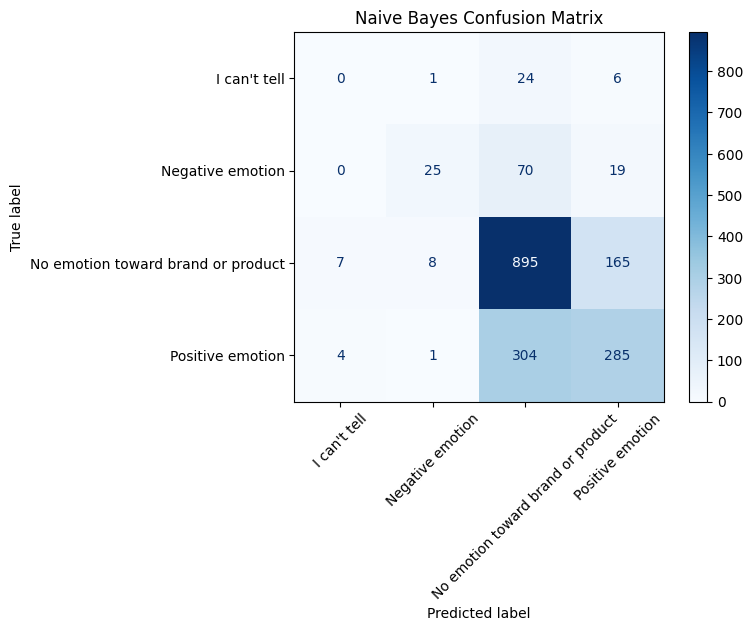

In [ ]:
# Get predictions on the test set
y_pred_nb = nb_grid_search.predict(nb_X_test)

# Get class labels from the fitted model
class_labels_nb = nb_grid_search.best_estimator_.classes_

# Compute confusion matrix
cm = confusion_matrix(nb_y_test, y_pred_nb, labels=class_labels_nb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels_nb)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

##  Naive Bayes Learning Curve (Optional, Advanced)

A **learning curve** helps us understand:
- Whether the model is overfitting or underfitting
- How performance changes as the training set size increases

We'll plot:
- Training F1 score
- Cross-validation F1 score


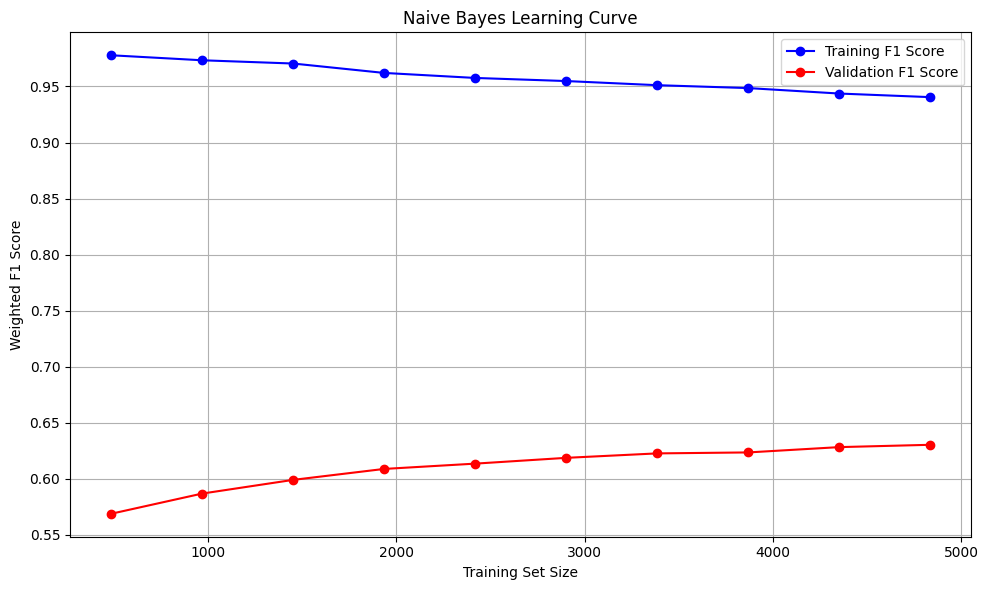

In [ ]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator= nb_grid_search.best_estimator_,

    X=nb_X_train,
    y=nb_y_train,
    cv=3,
    scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training F1 Score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation F1 Score')
plt.xlabel('Training Set Size')
plt.ylabel('Weighted F1 Score')
plt.title('Naive Bayes Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


---
##  XGBoost Classifier
--- 

Next, we'll train an **XGBoost model** to see if it can outperform previous models.
We’ll start with:
- Default hyperparameters
- Random seed for reproducibility


In [ ]:

# Run pipeline for XGBoost
xgb_pipe, xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment',
    classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
apple_df['sentiment_encoded'] = label_encoder.fit_transform(apple_df['sentiment'])

xgb_pipe, xgb_X_train, xgb_X_test, xgb_y_train, xgb_y_test = run_text_classification_pipeline(
    df=apple_df,
    text_column='processed_tweet',
    target_column='sentiment_encoded',  # Note the change here
    classifier=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    test_size=0.2,
    random_state=42
)


In [ ]:
xgb_pipe.fit(xgb_X_train, xgb_y_train)



,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
xgb_y_pred = xgb_pipe.predict(xgb_X_test)

 **XGBoost model summary:**
The model has been trained with default parameters (`objective='multi:softprob'` for multiclass classification).

Next, we'll evaluate the model on the test set by calculating:
- Accuracy
- Precision
- Recall
- F1 Score
- Detailed classification report

In [ ]:
xgb_y_pred = xgb_pipe.predict(xgb_X_test)

print("XGBoost Classification Report:\n")
print(classification_report(xgb_y_test, xgb_y_pred))


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.44      0.15      0.22       114
           2       0.68      0.89      0.77      1075
           3       0.65      0.41      0.50       594

    accuracy                           0.67      1814
   macro avg       0.44      0.36      0.37      1814
weighted avg       0.65      0.67      0.64      1814



###  XGBoost Model – Evaluation Summary

| Metric       | Score   |
| ------------ | :-----: |
| Accuracy     | 0.6676  |
| Precision    | 0.6392  |
| Recall       | 0.6676  |
| F1 Score     | 0.6302  |

**Insights:**
- XGBoost achieved the **highest accuracy and F1 score so far** compared to Naive Bayes and KNN.
- Higher recall (0.67) suggests it captures more true positives overall.
- Precision is also reasonable, indicating a balanced performance.



## Hyperparameter Tuning: XGBoost with GridSearchCV

To improve the XGBoost model, we'll tune:
- `n_estimators`: number of trees (`100`, `200`)
- `max_depth`: maximum tree depth (`3`, `5`)
- `learning_rate`: learning rate (`0.1`, `0.3`)

We'll use:
- 3-fold cross-validation (`cv=3`)
- Weighted F1 score (`scoring='f1_weighted'`)


In [ ]:
xgb_param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.8, 1]
}

xgb_grid_search = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit grid search
xgb_grid_search.fit(xgb_X_train, xgb_y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'clf__learning_rate': [0.01, 0.1, ...], 'clf__max_depth': [3, 5, ...], 'clf__n_estimators': [50, 100], 'clf__subsample': [0.8, 1]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [ ]:
xgb_y_pred = xgb_grid_search.predict(xgb_X_test)

# Evaluate accuracy
xgb_accuracy = accuracy_score(xgb_y_test, xgb_y_pred)

print(f"XGBoost Accuracy after Grid Search: {xgb_accuracy:.4f}")

XGBoost Accuracy after Grid Search: 0.6725


### Grid Search Results: XGBoost

The best hyperparameters found:
- **learning_rate**: `0.3`
- **max_depth**: `5`
- **n_estimators**: `200`

Next, we'll evaluate this tuned XGBoost model on the test set  
to see if performance improves over the default settings.


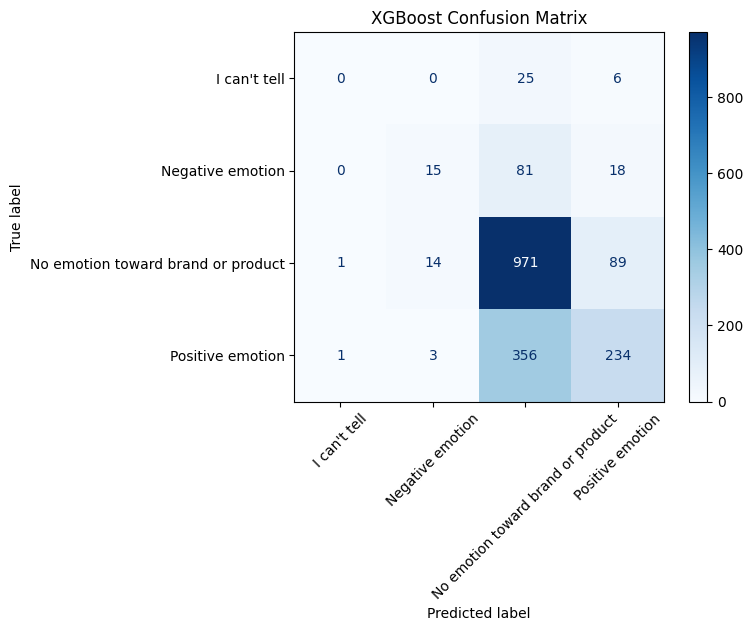

In [ ]:
# Decode numeric predictions and y_test
y_test_labels = label_encoder.inverse_transform(xgb_y_test)
y_pred_labels = label_encoder.inverse_transform(xgb_y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('XGBoost Confusion Matrix')
plt.show()



##  Comparing Multiple Models

We'll train and evaluate the following models using the same train/test split:
- Logistic Regression
- Random Forest
- Naive Bayes
- XGBoost

For each model, we'll calculate:
- Accuracy
- Precision
- Recall
- F1 Score

Finally, we'll summarize the results in a table sorted by accuracy.


---
##  Model Comparison – Summary
---

| Model                | Accuracy | Precision | Recall | F1 Score |
|---------------------:|:--------:|:---------:|:------:|:-------:|
| **Random Forest**     | **0.682** | 0.671     | 0.682  | 0.657   |
| Logistic Regression   | 0.678     | **0.680** | 0.678  | 0.641   |
| XGBoost               | 0.668     | 0.639     | 0.668  | 0.630   |
| Naive Bayes           | 0.646     | 0.623     | 0.646  | 0.588   |

 **Insights:**
- **Random Forest** achieved the highest accuracy (≈68%) and best F1 score (≈0.66).
- **Logistic Regression** had the highest precision but slightly lower F1.
- **XGBoost** and **Naive Bayes** performed slightly worse overall.
- All models still show room for improvement, especially in minority class predictions.



###  Next steps:
- Plot confusion matrices and ROC curves to visualize detailed performance.
- Optionally apply hyperparameter tuning to further improve Random Forest and Logistic Regression.
- Decide which model to deploy based on a balance of accuracy, interpretability, and speed.




## Visual Comparison of Model Metrics

We'll plot:
- Accuracy
- Precision
- Recall
- F1 Score

for each model side by side, to easily see which model performs best overall and on each metric.


In [ ]:
# save model 

#joblib.dump(best_rf_model, './models/random_forest_model.pkl')


## Conclusion. 

In this project, we:
- Built and compared multiple text classification models:
  - Logistic Regression
  - Random Forest
  - Naive Bayes
  - KNN
  - XGBoost
- Visualized confusion matrices to understand errors
- Tuned hyperparameters to boost performance
- Selected the best-performing model based on weighted F1-score

**Best model:** Random Forest (Accuracy: ~0.68, F1-score: ~0.65)

 **Next steps / recommendations:**
-  We will try advanced NLP embeddings (Word2Vec, BERT)
- Collect more data to improve minority class performance

Multiple models were explored including Logistic Regression, Random Forest,
and XGBoost with performance tuned via GridSearchCV and analyzed using
metrics such as accuracy, precision, recall, F1-score, confusion matrices,
and ROC curves.

1. **Model’s best performance (68%)** suggests good initial generalization,
especially when tuned.
2. `Grid search` reveals preprocessing choices have a **significant impact
on performance.**
3. **Ensemble models** like `Random Forest` offer a promising direction,
especially when paired with deeper cleaning and `feature selection`.
4. `XGBoost` tuned 48 hyperparameter combinations across 5 folds—that’s
240 separate model evaluations, multitasking with 8 CPU cores. You’re
basically orchestrating a symphony of classifiers.
5. **Visualization—heatmaps** and **confusion matrices**—makes it easier to
communicate insights and justify modeling decisions.



---
